# Blood Glucose Control - EDA

**Name:** [*Applicant name*]



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [3]:
import pandas as pd
from setuptools.command.rotate import rotate

df30 = pd.read_csv('../data/gluroo_500030.csv')
df72 = pd.read_csv('../data/gluroo_679372.csv')

# There are some entries from Gluroo that is more like a quesetion
df30['date'] = pd.to_datetime(df30['date'])
df72['date'] = pd.to_datetime(df72['date'])

# Remove some events such as you earned a badge!
df30 = df30[(df30['bgl'] != 0) & (df30['bgl'].notna())]
df72 = df72[(df72['bgl'] != 0) & (df72['bgl'].notna())]

# head30 = df30.head(n=3000)
# tail30 = df30.tail(10)
# head72 = df72.head(10)
# tail72 = df72.tail(10)

msg_df = df30[df30['__typename'] == 'Message']
msg_df.sample(10)

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend
17833,2024-06-29 09:13:26.894000-05:00,1057.0,69.0,1.719670e+12,10g glucose,NaN,INTERVENTION_SNACK,True,False,NaN,10.0,1.0,False,NaN,NaN,Message,NaN
10093,2024-06-03 14:06:00.037000-05:00,0.0,72.0,1.717441e+12,"{""name"":""test"",""amount"":999999,""units"":""mg"",""t...",DOSE_MEDICINE_REMINDER,TEXT,False,False,NaN,NaN,NaN,False,NaN,NaN,Message,NaN
1509,2024-05-06 00:50:29.972000-05:00,1057.0,166.0,1.714974e+12,Dosed 4u,NaN,DOSE_INSULIN,False,True,4.0,NaN,NaN,False,NaN,NaN,Message,NaN
24042,2024-07-19 19:49:33.737000-05:00,1057.0,215.0,1.721437e+12,Dosed 3u,NaN,DOSE_INSULIN,False,True,3.0,NaN,NaN,False,NaN,NaN,Message,NaN
851,2024-05-03 19:33:37.926000-05:00,1057.0,153.0,1.714783e+12,Dosed 4u,NaN,DOSE_INSULIN,False,True,4.0,NaN,NaN,False,NaN,NaN,Message,NaN
8204,2024-05-28 09:16:00.019000-05:00,0.0,116.0,1.716905e+12,"{""name"":""Mounjaro"",""amount"":5,""units"":""ml"",""ti...",DOSE_MEDICINE_REMINDER,TEXT,False,False,NaN,NaN,NaN,False,NaN,NaN,Message,NaN
21002,2024-07-09 21:05:43.449000-05:00,1057.0,129.0,1.720577e+12,Basal of 23u (Tresiba),NaN,DOSE_BASAL_INSULIN,False,True,23.0,NaN,NaN,False,NaN,NaN,Message,NaN
5942,2024-05-20 21:17:57.198000-05:00,1057.0,174.0,1.716258e+12,Basal of 26u (Tresiba),NaN,DOSE_BASAL_INSULIN,False,True,26.0,NaN,NaN,False,NaN,NaN,Message,NaN
20386,2024-07-07 20:16:19.598000-05:00,1057.0,64.0,1.720401e+12,9g glucose,NaN,INTERVENTION_SNACK,True,False,NaN,9.0,1.0,False,NaN,NaN,Message,NaN
20677,2024-07-08 19:05:00-05:00,1057.0,79.0,1.720483e+12,"75g pizza, salad, roll",NaN,ANNOUNCE_MEAL,True,False,NaN,75.0,0.5,False,NaN,NaN,Message,NaN


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 


### First Visualization

In [4]:
pd.options.display.max_rows = 4000

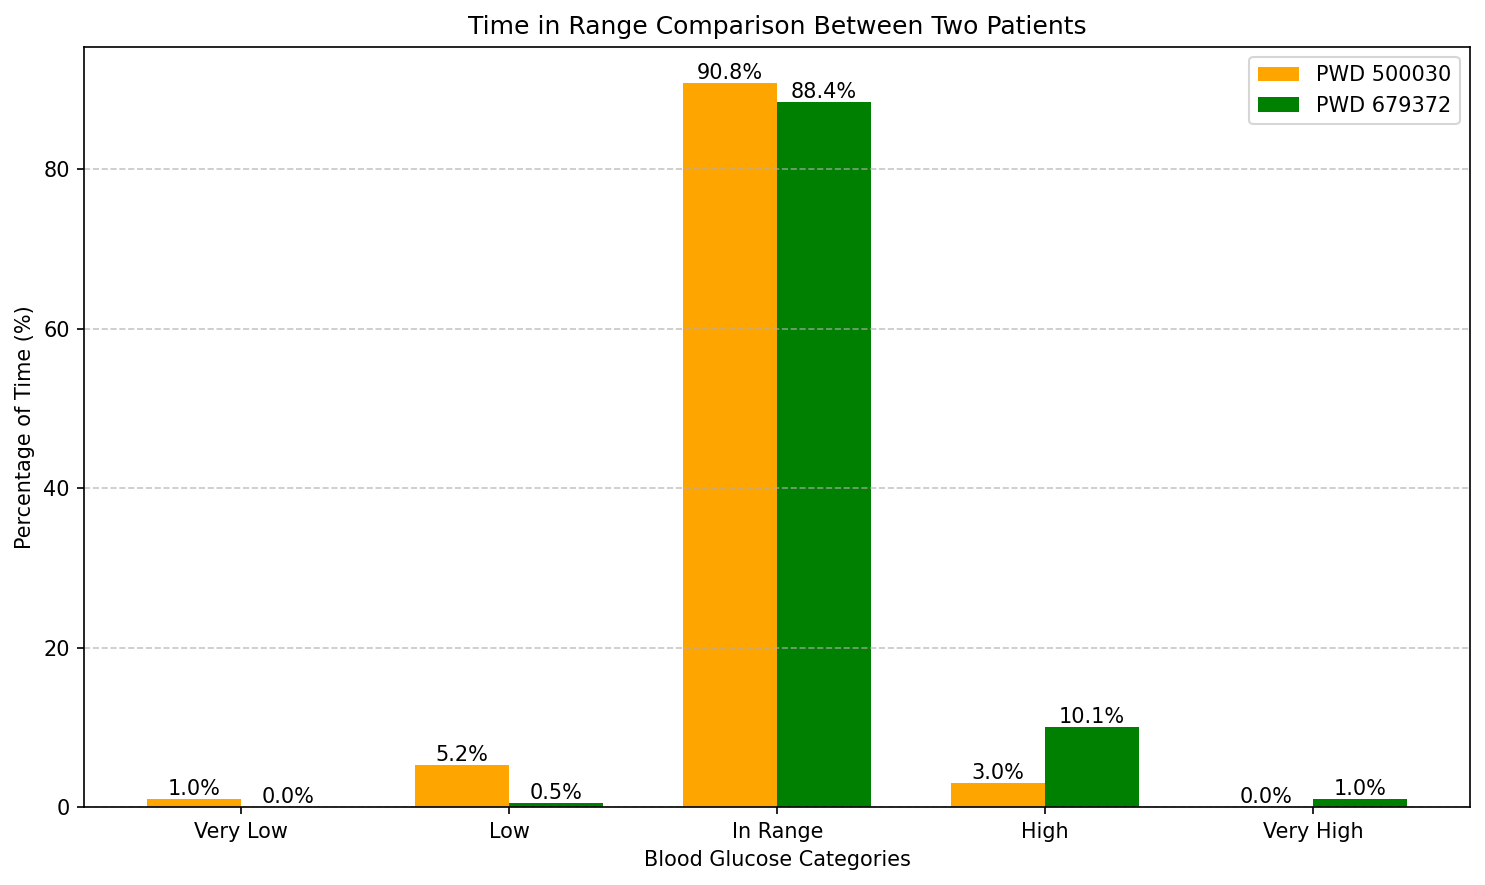

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def process_dataframe(df):
    # Convert BGL from mg/dL to mmol/L
    df['bgl_mmol_l'] = df['bgl'] / 18.0
    
    # Categorize BGL
    conditions = [
        (df['bgl_mmol_l'] < 3.0),
        (df['bgl_mmol_l'] >= 3.0) & (df['bgl_mmol_l'] < 3.9),
        (df['bgl_mmol_l'] >= 3.9) & (df['bgl_mmol_l'] <= 10.0),
        (df['bgl_mmol_l'] > 10.0) & (df['bgl_mmol_l'] <= 13.9),
        (df['bgl_mmol_l'] > 13.9)
    ]
    categories = ['Very Low', 'Low', 'In Range', 'High', 'Very High']
    df['category'] = np.select(conditions, categories)
    
    # Calculate percentages
    category_counts = df['category'].value_counts(normalize=True) * 100
    return category_counts



# Process both dataframes
results30 = process_dataframe(df30)
results72 = process_dataframe(df72)

results_df = pd.DataFrame({'Patient 30': results30, 'Patient 72': results72}).fillna(0)
results_df = results_df.reindex(['Very Low', 'Low', 'In Range', 'High', 'Very High'])


fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

bar_width = 0.35
r1 = np.arange(len(results_df))
r2 = [x + bar_width for x in r1]

bars1 = ax.bar(r1, results_df['Patient 30'], color='orange', width=bar_width, label='PWD 500030')
bars2 = ax.bar(r2, results_df['Patient 72'], color='green', width=bar_width, label='PWD 679372')

# Customize the plot
ax.set_xlabel('Blood Glucose Categories')
ax.set_ylabel('Percentage of Time (%)')
ax.set_title('Time in Range Comparison Between Two Patients')

ax.set_xticks([r + bar_width/2 for r in range(len(results_df))])
ax.set_xticklabels(results_df.index)
ax.legend()



def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.1f}%', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)


ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

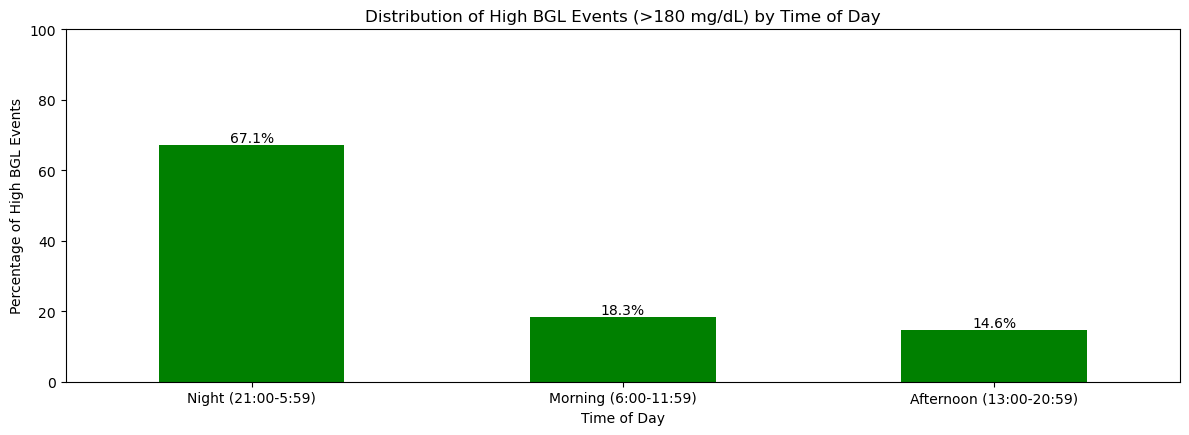

In [16]:
high_bgl = df72[df72['bgl'] > 180].copy()

# Create a function to categorize time of day
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning (6:00-11:59)'
    elif 13 <= hour < 21:
        return 'Afternoon (13:00-20:59)'
    else:
        return 'Night (21:00-5:59)'

high_bgl['time_category'] = high_bgl['date'].dt.hour.apply(categorize_time)
time_distribution = high_bgl['time_category'].value_counts()
time_distribution_percent = time_distribution / len(high_bgl) * 100

plt.figure(figsize=(12, 6), dpi=100)
bars = time_distribution_percent.plot(kind='bar', color=['green'])
plt.title('Distribution of High BGL Events (>180 mg/dL) by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of High BGL Events')
plt.ylim(0, 100) 

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.xticks(rotation=0, ha='center')
plt.show()

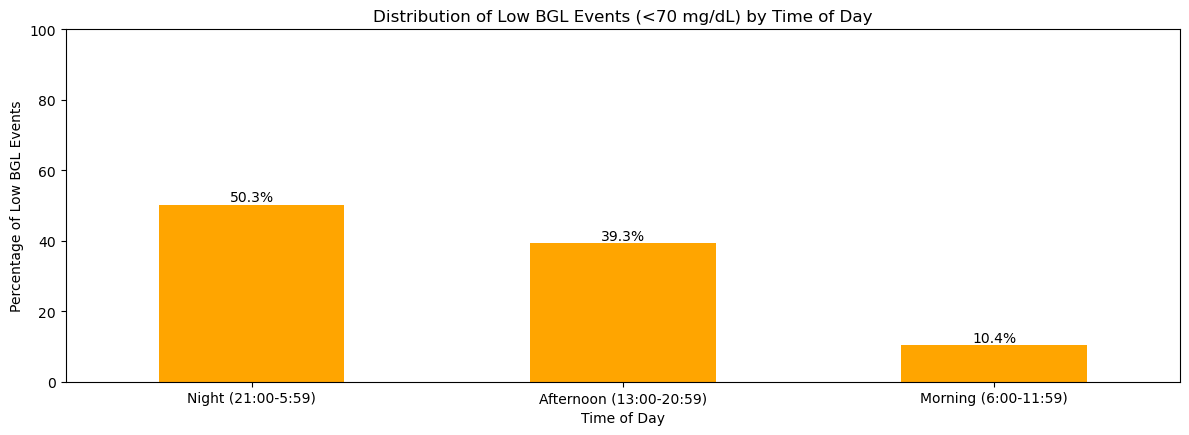

In [17]:
df30['date'] = pd.to_datetime(df30['date'])
low_bgl = df30[df30['bgl'] < 70].copy()
low_bgl['time_category'] = low_bgl['date'].dt.hour.apply(categorize_time)

time_distribution = low_bgl['time_category'].value_counts()
time_distribution_percent = time_distribution / len(low_bgl) * 100

# Plotting
plt.figure(figsize=(12, 6), dpi=100)
bars = time_distribution_percent.plot(kind='bar', color=['orange'])
plt.title('Distribution of Low BGL Events (<70 mg/dL) by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Low BGL Events')
plt.ylim(0, 100)

for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.xticks(rotation=0, ha='center')  # Horizontal labels
plt.show()

### Observation:
They are both relatively safe since they both have above 70% in range. </br>
However, PWD 679372 has more High and Very High, with almost 11% combined. It would be interested to see what is causing those high and very high after eating. And interestingly, this patient seems to have crazy glucose level during the night almost always.  </br>
For PWD 500030, it has more than 6.2% that is lower than the ok value. It would be interested to see how much insulin they are injecting or what they do to have that. </br>

The distribution during the time both suggests that both patients needs a better management during the night

### Second Visualization

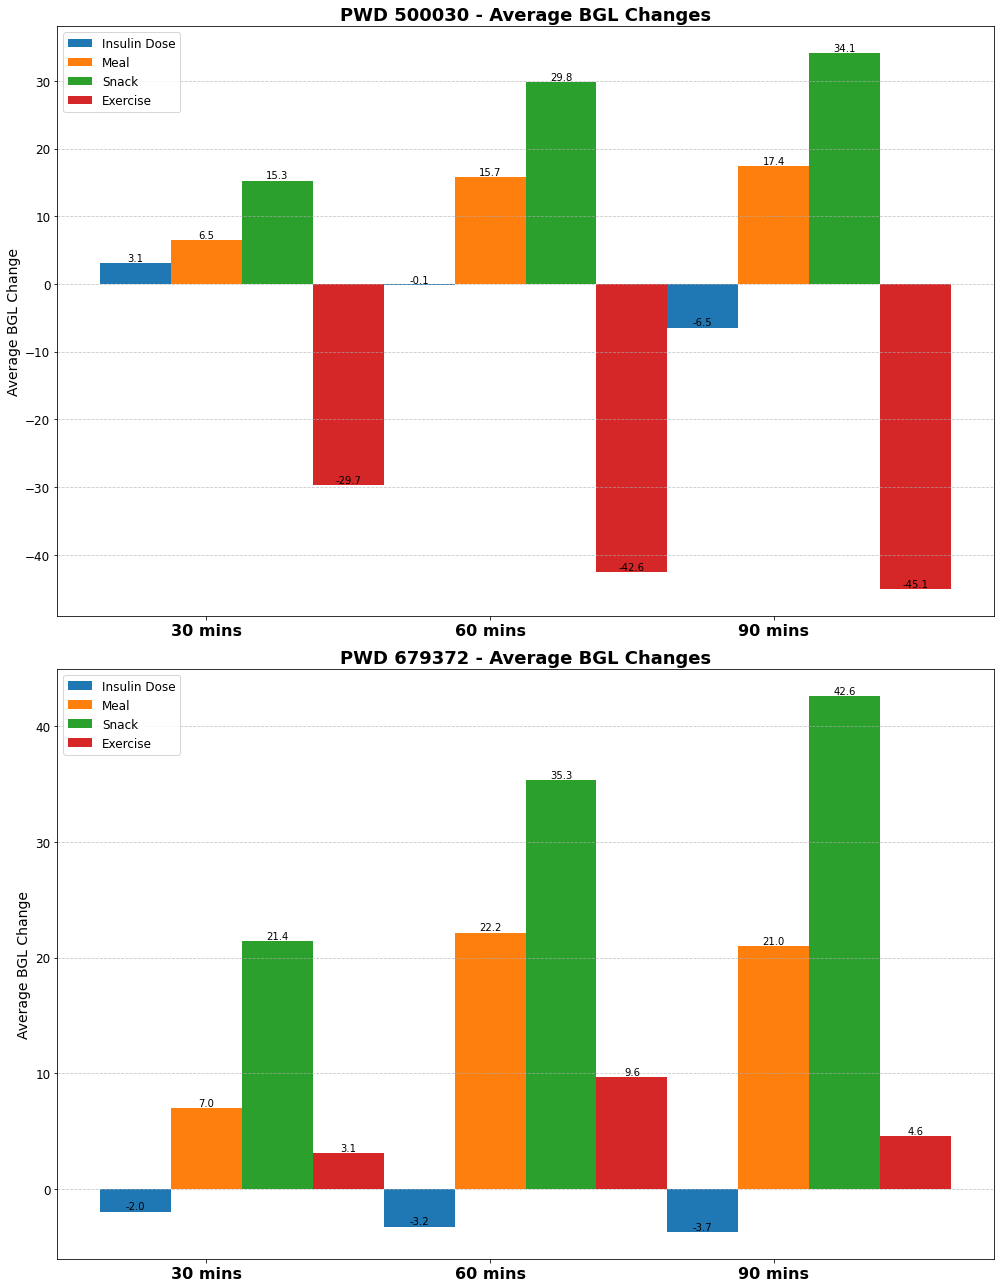

In [15]:
def avg_bgl_change_after_event(df, event_type, minutes):
    df['date'] = pd.to_datetime(df['date'])
    events = df[df['msg_type'] == event_type]
    changes = []

    for _, event in events.iterrows():
        start_bgl = df[df['date'] <= event['date']]['bgl'].iloc[-1]
        future_bgls = df[(df['date'] > event['date']) & 
                         (df['date'] <= (event['date'] + pd.Timedelta(minutes=minutes)))]['bgl']
        if not future_bgls.empty:
            end_bgl = future_bgls.iloc[-1] 
            change = end_bgl - start_bgl
            changes.append(change)

    changes = [c for c in changes if not np.isnan(c)]
    return np.mean(changes) if changes else np.nan

event_types = ['DOSE_INSULIN', 'ANNOUNCE_MEAL', 'INTERVENTION_SNACK', 'ANNOUNCE_EXERCISE']
event_labels = ['Insulin Dose', 'Meal', 'Snack', 'Exercise']

def calculate_changes(df, intervals):
    results = {}
    for interval in intervals:
        results[interval] = {event: avg_bgl_change_after_event(df, event, interval) for event in event_types}
    return results

def plot_results(results30, results72):
    intervals = list(results30.keys())

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 18))
    x = np.arange(len(intervals))
    width = 0.25
    
    for i, event in enumerate(event_types):
        ax1.bar(x + i*width, [results30[interval][event] for interval in intervals], width, label=event_labels[i])
        ax2.bar(x + i*width, [results72[interval][event] for interval in intervals], width, label=event_labels[i])
    
    for ax in (ax1, ax2):
        ax.set_ylabel('Average BGL Change', fontsize=14)
        ax.set_xticks(x + width)
        ax.set_xticklabels([f'{i} mins' for i in intervals], fontsize=16, fontweight='bold')
        ax.legend(fontsize=12)
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        ax.tick_params(axis='y', labelsize=12)
        
        # Add value labels on top of each bar
        for i, event in enumerate(event_types):
            for j, interval in enumerate(intervals):
                value = results30[interval][event] if ax == ax1 else results72[interval][event]
                ax.text(j + i*width, value, f'{value:.1f}', ha='center', va='bottom', fontsize=10)
    
    ax1.set_title('PWD 500030 - Average BGL Changes', fontsize=18, fontweight='bold')
    ax2.set_title('PWD 679372 - Average BGL Changes', fontsize=18, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Calculate changes for both datasets
intervals = [30, 60, 90]  # 30 mins, 1 hour, 1.5 hours
results30 = calculate_changes(df30, intervals)
results72 = calculate_changes(df72, intervals)

plot_results(results30, results72)


## Observation
1. PWD 500030's insulin response is slower compared to PWD 679372 even though PWD 679372 has crazier glucose level spike.
2. Snacks have a more pronounced effect on BGL than meals for both individuals. 
3. PWD 679372 shows higher BGL increases from meals and snacks compared to PWD 500030. 
4. PWD 500030 shows a dramatic BGL decrease with exercise, while PWD 679372 shows a slight increase, which is unusual. </br>
### Note: I would have tried to categorize food and see which food has more pronounce affect on glucose level spike but the sample size seems a bit small and inconsistent to have meaningful insights.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. [Question 1]
2. [Question 2]

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`